# redshift: z = 0.130

In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW_Z import NFW_Z

Remember: 500 solar masses is the mass per particle

In [2]:
bin_size = 0.02 # tis in kpc
starting_radius = 0.02 # tis in kpc

# THIS PART WORKS WITH NO RADIATIVE TRANSFER (NO RT)

In [3]:
전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")

In [4]:
dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 kpc, closest to 11.340 kpc
rad_array290_noRT = np.arange(starting_radius, 11.36, bin_size) # unit: kpc

density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + bin_size)**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume * 500
    i += 1

In [5]:
mass_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
h = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + bin_size)))
    how_many_particles = np.size(particles)
    mass_profile290_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [6]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6 = NFW_Z(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s(0.130)
c_vir6 = halo6.c_vir(0.130)
print('r_s =', r_s6)
print('c_vir =', c_vir6)

r_s = 0.9131856480211433
c_vir = 17.966797142633215


In [7]:
# the mass is made up by Dr Besla to estimate m_vir

halo6_1 = NFW_Z(2.85e8) # NFW using M_200 / 0.87
r_s6_1 = halo6_1.r_s(0.130)
c_vir6_1 = halo6_1.c_vir(0.130)
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

r_s = 0.8791101007744295
c_vir = 18.092733239850578


## plotting the AVERAGE density & mass profiles at this redshift (unnormalized)

In [8]:
'''this is to set in stone some of the variables we'll use later'''

# this finds density that best corresponds to the critical density
rho_crit = halo6.rho_crit(0.130) 
deviation_from_rho_crit = abs(density_profile290_noRT - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array290_noRT[index][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate = abs(density_profile290_noRT - density200)
ind = np.where(deviate == min(deviate))
rad200 = rad_array290_noRT[ind][0]
mass_at_200_times_rho_crit = mass_profile290_noRT[ind][0] 

# this defines the NFW profile
density_profile6 = halo6.rho(0.130, rad_array290_noRT)
density_profile6_1 = halo6_1.rho(0.130, rad_array290_noRT)

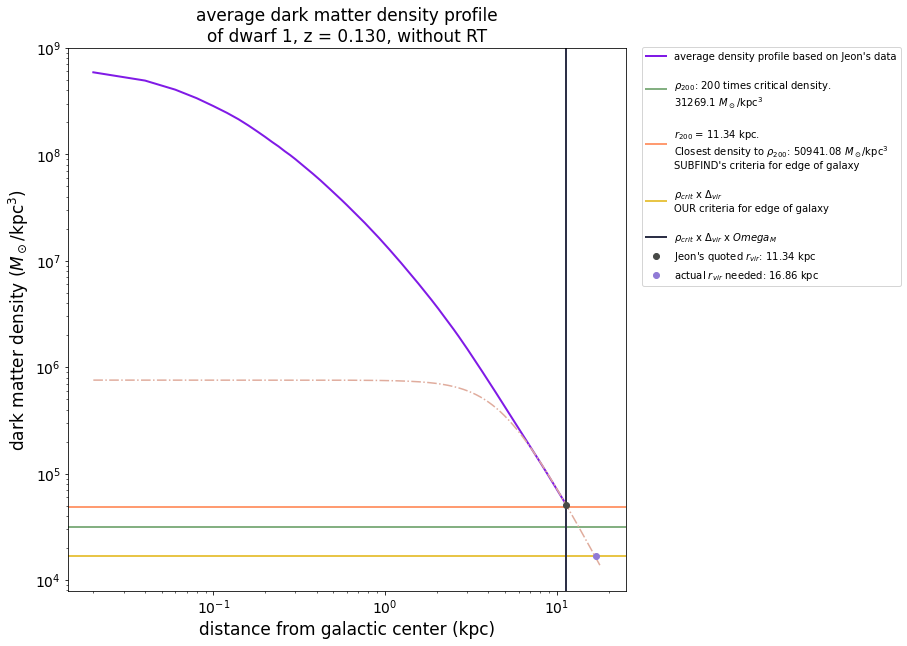

In [9]:
'''PLOTTING THE DENSITY PROFILE'''

# plotting the density profile and all the necessary straight lines

fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(rad_array290_noRT, density_profile290_noRT, color=(0.5, 0.1, 0.9, 1), linewidth=2, \
         label="average density profile based on Jeon's data")
plt.axhline(density200, color='#84B082', linewidth=2, \
           label="\n$ρ_{200}$: 200 times critical density.\n" + str(round(density200, 2)) + " $M_\odot$/kpc$^3$")
plt.axhline(rho_crit * halo6.delta_vir(0.130), color='#FF9B71', linewidth=2, \
           label="\n$r_{200}$ = " + str(round(rad200, 2)) + \
            " kpc.\nClosest density to $ρ_{200}$: " + str(round(density_profile290_noRT[ind][0], 2)) + \
            " $M_\odot$/kpc$^3$\nSUBFIND's criteria for edge of galaxy")
plt.axhline(rho_crit * halo6.delta_vir(0.130) * halo6.OmegaM_Z(0.130), color='#E8C547', linewidth=2, \
           label="\n$ρ_{crit}$ x $Δ_{vir}$\nOUR criteria for edge of galaxy\n")
plt.axvline(rad200, color='#2D3047', linewidth=2, \
           label="$ρ_{crit}$ x $Δ_{vir}$ x $Omega_{M}$")

# plotting the approximation in order to extend the density profile plots further,
# until it meets the ρ_crit x Δ_vir x Omega_M horizontal line.
# the radius where the intersection happens is called rad_rdo.

rho_delta_omega = rho_crit * halo6.delta_vir(0.130) * halo6.OmegaM_Z(0.130)

x = np.arange(starting_radius, 18, bin_size) 
plt.plot(x, 10**7.9/(x**3+105), color='#E0AC9D', linestyle='-.')
difference = abs(10**7.9/x**3+105 - rho_delta_omega)
where = np.where(difference == min(difference))
rad_rdo = x[where][0]
plt.plot(rad_array290_noRT[np.size(rad_array290_noRT) - 1], \
         density_profile290_noRT[np.size(density_profile290_noRT) - 1], \
         'o', color='#484A47', \
         label="Jeon's quoted $r_{vir}$: " + str(rad_array290_noRT[np.size(rad_array290_noRT) - 1]) + ' kpc')
plt.plot(rad_rdo, rho_delta_omega, 'o', color='#907AD6', label='actual $r_{vir}$ needed: ' + str(rad_rdo) + ' kpc')

# legends and the rest

plt.legend(bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density ($M_\odot$/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('average dark matter density profile\nof dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.show()